In [21]:
import pandas as pd
from sklearn.cross_validation import train_test_split
#can also use from sklearn.model_selection  import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.decomposition import KernelPCA

In [22]:
dataset = pd.read_csv(r'C:\Users\vipul\Desktop\Udemy\Part 9 - Dimensionality Reduction\Section 45 - Kernel PCA\Social_Network_Ads.csv')

In [23]:
x = dataset.iloc[:,2:4].values
y = dataset.iloc[:,-1].values

In [24]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.25,random_state = 0)

In [25]:
sc_x = StandardScaler()

In [26]:
x_train = sc_x.fit_transform(x_train)

In [27]:
x_test = sc_x.transform(x_test)

In [28]:
#Plot the result withou PCA and get to nkow that it is non linearlly seperable model
#aftr PCA it will be linearlly seperable


kpca = KernelPCA(n_components = 2,kernel = 'rbf')
x_train = kpca.fit_transform(x_train)
x_test = kpca.transform(x_test)

In [29]:
reg = LogisticRegression(random_state = 0)

In [30]:
reg.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=0, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [31]:
y_pred = reg.predict(x_test)

In [32]:
cm = confusion_matrix(y_pred,y_test)

In [33]:
print(cm)

[[64  6]
 [ 4 26]]


In [44]:
x1,x2 = np.meshgrid(np.arange(start = x_train[:,0].min() - 1,stop = x_train[:,0].max() + 1,step = 0.01),
                    np.arange(start = x_train[:,1].min() - 1,stop = x_train[:,1].max() + 1,step = 0.01))
plt.contourf(x1,x2,reg.predict((np.array([x1.ravel(),x2.ravel()]).T)).reshape(x1.shape),alpha = 0.75,
                                     cmap = ListedColormap(('blue','cyan')))
plt.xlim(x1.min(),x1.max())
plt.ylim(x2.min(),x2.max())
for i,j in enumerate(np.unique(y_train)):
    plt.scatter(x_train[y_train==j,0],x_train[y_train==j,1],c= ListedColormap(('blue','cyan'))(i),label = j)

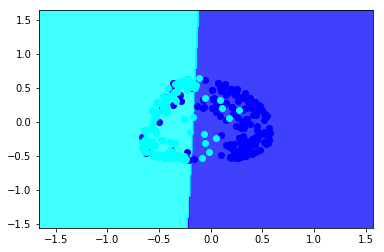

In [45]:
plt.show()